# Hough 변환을 사용해 직선과 원 검출(P149)

허프변환은 이미지에서 모양을 찾는 가장 유명한 방법입니다. 이 방법을 이용하면 이미지의 형태를 찾거나, 누락되거나 깨진 영역을 복원할 수 있습니다.

HoughLinesP : 확률 허프 변환

HoughLines를 쓰지 않고 HoughLinesP를 사용하는 이유: 허프변환은 모든 점에 대해서 계산을 하기 때문에 시간이 많이 소요됩니다. 율 허프변환(Probabilistic Hough Transform)은 이전 허프변환을 최적화 한 것 입니다. 모든 점을 대상으로 하는 것이 아니라 임의의 점을 이용하여 직선을 찾는 것입니다. 단 임계값을 작게 해야만 합니다.

*  lines = cv2HoughLineP(img, rho, theta, threshold[, lines, minLineLength, maxLineGap])
: 검출한 선의 결과 값이 선의 시작과 끝 좌표이다.
    * img : 입력영상, 이미지
    * rho : 거리측정 해상도, 0~1
    * theta : 각도 측정 해상도, 라디안 단위( np.pi/0~180)
    * threshold : 직선으로 판단할 최소한의 동일 개수 
        * 작은 값 : 정확도 감소, 검출 개수 증가
        * 큰 값 : 정확도 증가, 검출 개수 감소 
    * lines : 거물된 선 좌표, N X 1 X 4 배열 ( x1, y1, x2, y2 ) 
    * minLineLength : 선으로 인정할 최소 길이 
    * maxLineGap : 선으로 판단한 최대 간격 
    * min_theta, max_theta : 검출을 위해 사용할 최대, 최소 각도
   

* circles = cv2.Houghcircles(img, method, dp, minDist[, circles, param1, param2, minRadius, maxRadius])
    * img : 입력 영상, 이미지
    * method : 검출 방식 선택, 
        * cv2.HOUGH_GRADIENT 만 가능 
    * dp : 입력 영상, 이미지와 경사 누적의 해상도 반비례율, 1: 입력과 동일, 값이 커질수록 부정확
    * minDist : 원들 중심간의 최소 거리, 0: 에러 (동심원 검출 불가)
    * circles : 검출 원 결과, N X 1 X 3 부동 소수점 배열 (x, y, 반지름)
    * param1 : 캐니 엣지에 전달할 스레시홀드 최대 값(최소 값은 최대 값의 2배 작은 값을 전달)
    * param2 : 경사도 누적 경계 값(값이 작을수록 잘못된 원 검출)
    * minRadius, maxRadius : 원의 최소 반지름, 최대 반지름 (0이면 영상의 크기)

In [59]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [60]:
# 이미지를 그려줍니다.
img = np.zeros((500,500), np.uint8)
cv2.circle(img, (200, 200), 50, 255, 3)
cv2.line(img, (100, 400), (400, 350), 255, 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [61]:
# 선을 검출합니다.
lines = cv2.HoughLinesP(img, 1, np.pi/180, 10, 100, 10)[0]

print('lines: ', lines)

lines:  [[ 99 401 384 351]]


In [62]:
# 원을 검출합니다.
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 15, param1=200, param2=30)[0]

print(circles)

[[200.5 200.5  52.3]]


In [63]:
#검출된 직선과 원을 그린다.
dbg_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)

print(dbg_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [64]:
# 선을 그려줍니다.
for x1, y1, x2, y2 in lines:
    print('Detected line: ({} {}) ({} {})'.format(x1, y1, x2, y2))
    cv2.line(dbg_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

Detected line: (99 401) (384 351)


In [65]:
# 원을 그려줍니다.
for c in circles:
    print('Detected circle: center = ({}, {}), radius = {}'.format(c[0],c[1],c[2]))
    cv2.circle(dbg_img, (c[0], c[1]), c[2], (0, 255, 0), 2)

Detected circle: center = (200.5, 200.5), radius = 52.29999923706055


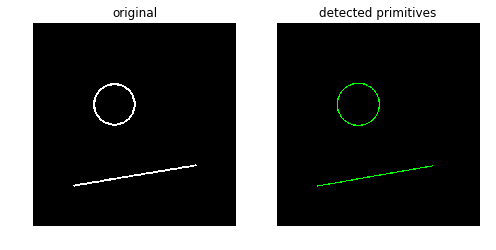

In [66]:
# 결과를 시각화합니다.
plt.figure(figsize=(8,10))

plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('detected primitives')
plt.axis('off')
plt.imshow(dbg_img)
plt.show()

# 스토쿠 선 검출 

In [69]:
import cv2
import numpy as np

In [70]:
# 이미지를 불러옵니다.
img = cv2.imread('img/sudoku.jpg')

In [71]:
# 이미지 복사본을 만듭니다.
img2 = img.copy()

In [72]:
# 그레이 스케일로 변환합니다.
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [73]:
# 엣지를 검출합니다.
edges = cv2.Canny(imgray, 50, 200)

In [74]:
# 확률 허프 변환을 적용합니다.
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)

print('lines: ', lines)

lines:  [[[ 48 147  89 147]]

 [[ 82 141  83  39]]

 [[ 43 151  43 129]]

 [[ 68  17 210  17]]

 [[142 217 189 217]]

 [[ 19 167  69 167]]

 [[ 38 215  40 159]]

 [[ 32  39 205  39]]

 [[145 205 145  41]]

 [[115 282 147 283]]

 [[ 56 145  90 145]]

 [[186  12 211  12]]

 [[100 193 101 168]]

 [[ 15 280  44 279]]

 [[ 37 101  90 102]]

 [[204  46 204  79]]

 [[ 38  41 191  41]]

 [[ 91 146 169 146]]

 [[ 30 213  85 213]]

 [[ 39 104 122 104]]

 [[116 126 207 126]]

 [[115  81 191  81]]

 [[116 124 150 124]]

 [[ 23 128  24  91]]

 [[ 21 132  21 107]]

 [[155 171 203 171]]

 [[152 192 188 192]]

 [[208 127 208 151]]

 [[ 96 168 152 168]]

 [[167 169 214 169]]

 [[ 89 278 110 278]]

 [[190  13 211  13]]

 [[119 240 201 241]]

 [[ 88 216 133 216]]

 [[161 239 216 239]]

 [[ 16 237  17 201]]

 [[ 16 273  53 274]]

 [[ 59 216  87 215]]

 [[166  19 211  19]]

 [[146 278 172 281]]

 [[ 78  62 109  62]]

 [[122  10 148  10]]

 [[ 91 253 111 253]]

 [[ 70  81  95  81]]

 [[147  60 206  60]]

 [

In [75]:
# 검출된 선을 그려줍니다.
for line in lines:
    
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)

In [76]:
# 사진을 합칩니다.
merged = np.hstack((img, img2))

In [77]:
# 결과를 도출합니다.
cv2.imshow('Probability hough line', merged)
cv2.waitKey()
cv2.destroyAllWindows()

# 메디안 플로우 객체 추적기(P156)

#### 추적할 객체를 선택

* ret = cv2.selectROI([win_name,] img[, showCrossHair=True, fromCenter=False])
    * win_name : ROI 선택을 진행할 창의 이름, str
    * img : ROI 선택을 진행할 이미지, Numpy ndarray
    * showCrossHair : 선택 영역 중심에 십자 모양 표시 여부 
    * fromCenter : 마우스 시작 지점을 영역의 중심으로 지정 
    * ret : 선택한 영역 좌표와 크기(x, y, w, h)

In [11]:
import cv2
import numpy as np

In [20]:
# 비디오를 불러옵니다.
cap = cv2.VideoCapture('data/traffic.mp4')

print(cap)

<VideoCapture 0000017A2D383A90>


In [21]:
#비디오 한프레임씩 읽기
_, frame = cap.read()

print(frame)

[[[237 225 211]
  [237 225 211]
  [237 225 211]
  ...
  [ 95 142 144]
  [103 150 152]
  [108 155 157]]

 [[237 225 211]
  [237 225 211]
  [237 225 211]
  ...
  [ 89 136 138]
  [ 85 132 134]
  [ 82 129 131]]

 [[237 225 211]
  [237 225 211]
  [237 225 211]
  ...
  [ 79 126 128]
  [ 67 114 116]
  [ 61 108 110]]

 ...

 [[ 66  75  90]
  [ 66  75  90]
  [ 66  75  90]
  ...
  [ 87  82  88]
  [ 87  82  88]
  [ 87  82  88]]

 [[ 66  75  90]
  [ 65  74  89]
  [ 66  75  90]
  ...
  [ 87  82  88]
  [ 87  82  88]
  [ 87  82  88]]

 [[ 65  74  89]
  [ 65  74  89]
  [ 66  75  90]
  ...
  [ 87  82  88]
  [ 87  82  88]
  [ 87  82  88]]]


In [22]:
#추적할 객체 선택
bbox = cv2.selectROI(frame, False, False)

print(bbox)

cv2.destroyAllWindows()

(401, 319, 124, 59)


#### 선택한 객체 추적

cv2.Tracker는 init() 함수로 트랙커에 초기 추적 대상 객체의 위치를 알려주고 
update() 함수에 다음 프레임을 전달하면 객체가 이동한 위치를 반환합니다. 
* tracker = cv2.TrackerMedianFlow_create() : 객체의 전방향/역방향을 추적해서 불일치성 측정

In [23]:
# 메디안 플로우 추적기 생성
tracker = cv2.TrackerMedianFlow_create()

print(tracker)

<TrackerMedianFlow 0000017A2D383E30>


In [24]:
# 추적기 초기화
status_tracker = tracker.init(frame, bbox)

print(status_tracker)

True


In [25]:
# 변수 초기화
fps = 0 # fps = Frames Per Second

In [28]:
while True:
    
    status_cap, frame = cap.read()
    
    if not status_cap:
        break
        
    if status_tracker:
        timer = cv2.getTickCount() 
        # getTickCount 함수가 호출되는 순간까지 참조 이벤트 (순간 기계가 켜졌을 때처럼) 이후의 클럭 사이클 수를 반환합니다.
        # 클럭: 순차회로에 가해지는 전기적 진동의 속도를 나타내는 단위이며 Hz로 표기합니다.
        
        status_tracker, bbox = tracker.update(frame)
        
    if status_tracker:
        x, y, w, h = [int(i) for i in bbox]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 15)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

        cv2.putText(frame, "FPS: %.0f" % fps, (0, 80), cv2.FONT_HERSHEY_SIMPLEX, 3.5, (0, 0, 0), 8);
    else:
        cv2.putText(frame, "Tracking failure detected", (0, 80), cv2.FONT_HERSHEY_SIMPLEX, 3.5, (0,0,255), 8)
        
    cv2.imshow("MedianFlow tracker", frame)

    k = cv2.waitKey(1)
    
    if k == 27: 
        break
    
cv2.destroyAllWindows()

# 추적 API의 다양한 알고리즘을 사용해 객체 추적(P159)

* KCF : Kernelized Correlation Filters 
* MIL : Multiple Instance Learning
* TLD : Tracking, Learning and Detection

In [27]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto

cv2.namedWindow('frame')

for name, tracker in (('KCF', cv2.TrackerKCF_create), ('MIL', cv2.TrackerMIL_create), ('TLD', cv2.TrackerTLD_create)):
    tracker = tracker()
    initialized = False

    video = cv2.VideoCapture('data/traffic.mp4')
    bbox = (878, 266, 1153-878, 475-266)

    i = 0
    while True:
        i += 1
        t0 = time.time()
        ok, frame = video.read()
        if not ok: 
            break

        if initialized:
            tracked, bbox = tracker.update(frame)
        else:
            cv2.imwrite('frame.png', frame)
            tracked = tracker.init(frame, bbox)
            initialized = True

        fps = 1 / (time.time() - t0)
        cv2.putText(frame, 'tracker: {}, fps: {:.1f}'.format(name, fps),
                    (20, 70), cv2.FONT_HERSHEY_SIMPLEX,  3, (255, 0, 0), 4)            
        if tracked:
            bbox = tuple(map(int, bbox))
            cv2.rectangle(frame, (bbox[0], bbox[1]), 
                          (bbox[0]+bbox[2], bbox[1]+bbox[3]), 
                          (0, 255, 0), 3)
        cv2.imshow('frame', frame)
        if i == 50:
            cv2.imwrite('frame{}.png'.format(name), frame)
        if cv2.waitKey(3) == 27:
            break

cv2.destroyAllWindows()

Using matplotlib backend: Qt5Agg


# 체스판 패턴 검출

 * found, corners = cv2.findChessboardCorners(img, (rows, columns))
    - found : 검출 여부 
    - corners : 검출 좌표

In [16]:
import cv2
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline # %matplotlib auto는 새 창을 띄워 결과를 알려준다.

In [ ]:
# 이미지를 불러옵니다.
image_chess = cv2.imread('data/chessboard.png')

In [19]:
# 검출기를 통해 발견 유무와, 코너들을 찾습니다. 
found, corners = cv2.findChessboardCorners(image_chess, (6, 9))

print('found: ', found)
print(" ")
print('corners: ', corners)
print(" ")

found:  True
 
corners:  [[[270.61136   62.477234]]

 [[268.5391    86.75204 ]]

 [[267.4351   111.208694]]

 [[265.95007  135.638   ]]

 [[264.59006  160.46764 ]]

 [[263.3721   185.4706  ]]

 [[246.54207   60.280457]]

 [[244.79836   84.608   ]]

 [[243.50117  109.323   ]]

 [[241.81244  133.93675 ]]

 [[240.47296  158.76219 ]]

 [[239.28464  183.98196 ]]

 [[222.36826   57.81148 ]]

 [[220.552     82.53905 ]]

 [[219.195    107.27624 ]]

 [[217.55934  132.34543 ]]

 [[215.79434  157.43428 ]]

 [[214.38509  182.63223 ]]

 [[197.4108    55.525414]]

 [[195.58357   80.44347 ]]

 [[194.13084  105.40188 ]]

 [[192.39607  130.5032  ]]

 [[190.56784  155.72795 ]]

 [[189.03177  181.42647 ]]

 [[172.37984   53.299732]]

 [[170.53827   78.38976 ]]

 [[168.6652   103.46278 ]]

 [[166.98509  128.76044 ]]

 [[165.36087  154.43936 ]]

 [[163.48524  180.24901 ]]

 [[146.60446   50.841015]]

 [[145.04036   76.328575]]

 [[143.21895  101.53109 ]]

 [[141.38982  127.32353 ]]

 [[139.41524  152.88849

In [20]:
# 가정 설정문에 True가 들어오는 지를 확인합니다.
assert found == True, "can't find chess board pattern"

# assert는 뒤의 조건이 True가 아니면 AssertError를 발생한다.

#### 왜 assert가 필요한 것일까?

어떤 함수는 성능을 높이기 위해 반드시 정수만을 입력받아 처리하도록 만들 수 있다. 
이런 함수를 만들기 위해서는 반드시 함수에 정수만 들어오는지 확인할 필요가 있다. 
이를 위해 if문을 사용할 수도 있고 '예외 처리'를 사용할 수도 있지만 '가정 설정문'을 사용하는 방법도 있다.

In [21]:
a = 3

In [22]:
assert a == 2

AssertionError: 

In [23]:
assert a == 3

In [ ]:
# 그림을 그려줄 도화지를 만들어 줍니다.
dbg_image_chess = image_chess.copy()
print('dbg_image_chess: ', dbg_image_chess)

In [25]:
# dbg_image_chess에 그림을 그려줍니다.
cv2.drawChessboardCorners(dbg_image_chess, (6,9), corners, found)

dbg_image_chess:  [[[164 164 164]
  [167 167 167]
  [169 169 169]
  ...
  [217 217 217]
  [219 219 219]
  [209 209 209]]

 [[166 166 166]
  [166 166 166]
  [167 167 167]
  ...
  [218 218 218]
  [219 219 219]
  [218 218 218]]

 [[166 166 166]
  [148 148 148]
  [166 166 166]
  ...
  [218 218 218]
  [217 217 217]
  [217 217 217]]

 ...

 [[148 148 148]
  [149 149 149]
  [150 150 150]
  ...
  [129 129 129]
  [132 132 132]
  [150 150 150]]

 [[151 151 151]
  [151 151 151]
  [153 153 153]
  ...
  [129 129 129]
  [130 130 130]
  [149 149 149]]

 [[149 149 149]
  [153 153 153]
  [154 154 154]
  ...
  [128 128 128]
  [134 134 134]
  [148 148 148]]]


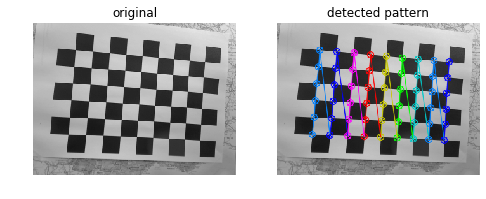

In [29]:
# 결과를 도출합니다.
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(image_chess)
plt.subplot(122)
plt.title('detected pattern')
plt.axis('off')
plt.imshow(dbg_image_chess)
plt.show()

# 원 그리드 패턴 검출

* retval, centers = findCirclesGrid(image, patternSize, flags)
    - flags : 
        - CALIB_CB_SYMMETRIC_GRID* : 대칭 원 패턴에서 사용
        - CALIB_CB_ASYMMETRIC_GRID** 비대칭 원 패턴에서 사용
        - CALIB_CB_CLUSTERING : 알고리즘을 사용하여 강하나, 배경의 노이즈 영향이 크다.

In [38]:
# 이미지를 불러옵니다.
image_circles = cv2.imread('data/circlesgrid.png')

In [39]:
# 원 그리드를 찾아냅니다.
found, corners = cv2.findCirclesGrid(image_circles, (6, 6), cv2.CALIB_CB_SYMMETRIC_GRID)

In [40]:
# 가정 설정문으로 found에 True가 들어오는지 확인합니다.
assert found == True, 'x'

In [41]:
# 그림을 그려줄 도화지를 만들어줍니다.
dbg_image_circles = image_circles.copy()

In [42]:
# 그림을 그려줍니다.
cv2.drawChessboardCorners(dbg_image_circles, (6, 6), corners, found)

array([[[124, 124, 124],
        [144, 144, 144],
        [150, 150, 150],
        ...,
        [125, 125, 125],
        [141, 141, 141],
        [163, 163, 163]],

       [[124, 124, 124],
        [146, 146, 146],
        [150, 150, 150],
        ...,
        [161, 161, 161],
        [159, 159, 159],
        [163, 163, 163]],

       [[121, 121, 121],
        [148, 148, 148],
        [151, 151, 151],
        ...,
        [172, 172, 172],
        [151, 151, 151],
        [173, 173, 173]],

       ...,

       [[127, 127, 127],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [167, 167, 167],
        [169, 169, 169],
        [167, 167, 167]],

       [[126, 126, 126],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [167, 167, 167],
        [166, 166, 166],
        [170, 170, 170]],

       [[125, 125, 125],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [167, 167, 167],
        [166, 166, 166],
        [167, 167, 167]]

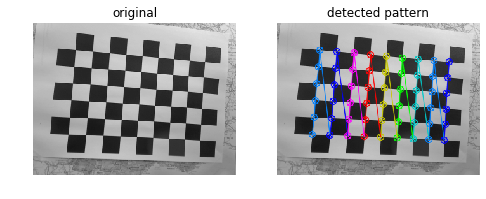

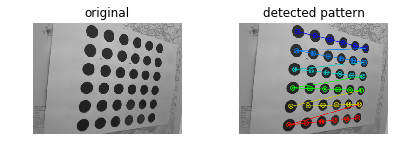

In [43]:
# 결과를 도출합니다.
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title('original')
plt.axis('off')
plt.imshow(image_chess)
plt.subplot(222)
plt.title('detected pattern')
plt.axis('off')
plt.imshow(dbg_image_chess)
plt.show()
plt.subplot(223)
plt.title('original')
plt.axis('off')
plt.imshow(image_circles)
plt.subplot(224)
plt.title('detected pattern')
plt.axis('off')
plt.imshow(dbg_image_circles)
plt.tight_layout()
plt.show()

# SVM 모델을 사용한 단순 보행자 검출기(P171)
#### 사람의 특징을 가진 객체와 아닌 객체를 구분한다.

(1) HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins, win_sigma, threshold_L2hys, gamma_correction, nlevels)
- win_size : 탐지 윈도우 사이즈
- block_size : 픽셀에서의 블록 사이즈 , 현재 (16,16) 만 지원됨
- block_stride : 블록의 보폭, 셀 크기의 배수여야 함  
- cell_size : 셀 사이즈, 현재 (8, 8)만 지원됨
- nbins : bin의 갯수, 현재 9 bin 만 지원됨 
- win_sigma : 가우시안 스무딩 윈도우 파라미터, DEFAULT_WIN_SIGMA
- threshold_L2hys :  L2-Hys normalization method shrinkage. 
- gamma_correction : 감마 보정 전처리가 필요한지, True, false
- nlevels : 탐지 창이 최대로 증가함 


(2) setSVMDetector(detector)
- detector : 선형 SVM 분류기 

(3) detectMultiScale(img, found_locations, hit_threshold, win_stride, padding, scale0, group_threshold) 

- img : 원본 이미지, CV_8UC1 and CV_8UC4 타입 만 지원한다. 색깔을 가지고 있거나 그레이 스케일 이미지면 된다.
- found_locations : 탐지된 객체 경계
- hit_threshold : feature와 SVM 평면 간 사이에 대한 임계값, 보통 0, 자유계수, 생략됨 
- win_stride : 윈도우의 폭, 블록 폭의 배수여야 함, 이를 작게 할 수록 탐지 시간이 늘어나며, 반대로 크게 하면 탐색 윈도우 숫자는 더 작아지고, 이는 탐지속도를 빠르게 해주지만 탐지를 못할 확률이 높아짐 
- padding : CPU 인터페이스 호환성을 유지하기 위한 파라미터, (0, 0)이어야 함
- scale0 : 작게 할수록 이미지 레이어의 계수를 증가시키고 계산 시간 증가(피라미드 형식)
- group_threshold : 비슷한 임계 값을 조절하는 계수, 감지 되면 일부 객체는 많은 사각형으로 덮일 수 있음, 0은 그룹화를 수행하지 않음

(4) getDefaultPeopleDetector()
- 함수는 64×128 크기의 윈도우에서 똑바로 서 있는 사람을 검출하는 용도로 훈련된 분류기 계수를 반환
- HOGDescriptor 클래스를 이용하여 원하는 객체를 검출하려면 먼저 검출할 객체에 대해 훈련된 SVM 분류기 계수를 HOGDescriptor::setSVMDetector() 함수에 등록해야 합니다. 


In [31]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# 이미지를 불러옵니다.
image = cv2.imread('data/people.jpg')

In [33]:
# HOG 특징 기술자와 검출기를 생성합니다.
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor.getDefaultPeopleDetector())

In [35]:
# 사람들의 이미지를 검출합니다.
locations, weights = hog.detectMultiScale(image)

print('location: ', locations)
print(' ')
print('weights: ', weights)
print(' ')

location:  [[ 25 119 120 239]
 [102 167  93 185]
 [170 137 104 207]
 [276 153  93 186]
 [346 158  93 185]
 [211 113 121 241]]
 
weights:  [[1.50968446]
 [1.44101454]
 [1.24035125]
 [1.42645823]
 [0.51397189]
 [1.08009692]]
 


In [36]:
# 검출된 사람들을 바운딩 박스로 표시합니다.
dbg_image = image.copy()
for loc in locations:
    cv2.rectangle(dbg_image, (loc[0], loc[1]), (loc[0]+loc[2], loc[1]+loc[3]), (0, 255, 0), 2)

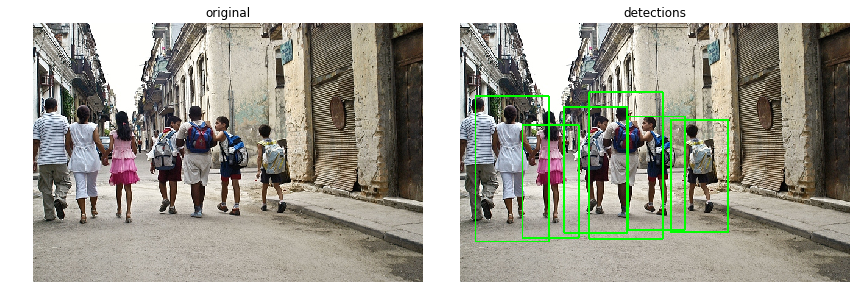

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(image[:,:,[2,1,0]])
plt.subplot(122)
plt.title('detections')
plt.axis('off')
plt.imshow(dbg_image[:,:,[2,1,0]])
plt.tight_layout()
plt.show()
                  